# Compiling Open Graphs to Fusion Networks

Here we should how to compile an open graph into a fusion network comprised of linear resource states.

First we create an initial graph.

In [1]:
import networkx as nx
from optyx.compiler import OpenGraph, Measurement
from graphix.pauli import Plane

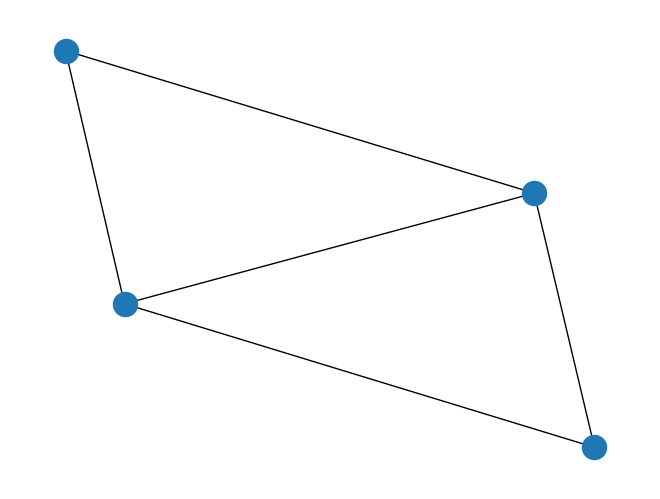

In [6]:
g = nx.Graph([(0, 1), (0, 2), (2, 1), (0, 3), (2, 3)])
meas = {i: Measurement(i, Plane.XY) for i in range (3)}
inputs = [0]
outputs = [3]

og = OpenGraph(g, meas, inputs, outputs)

nx.draw(g)

We then use `open_graph_to_linear_fusion_network` to convert the open graph to a fusion network.

In [11]:
from optyx.compiler.semm import open_graph_to_linear_fusion_network

fn = open_graph_to_linear_fusion_network(og, 4)
print("Linear resource states", fn.resources)
print("Measurements", fn.measurements)
print("Fusions", fn.fusions)

Linear resource states [[0, 1, 2, 3]]
Measurements {0: Measurement(angle=0, plane=<Plane.XY: 0>), 1: Measurement(angle=1, plane=<Plane.XY: 0>), 2: Measurement(angle=2, plane=<Plane.XY: 0>)}
Fusions [Fusion(node1=0, node2=2, fusion_type='Y'), Fusion(node1=0, node2=3, fusion_type='Y')]


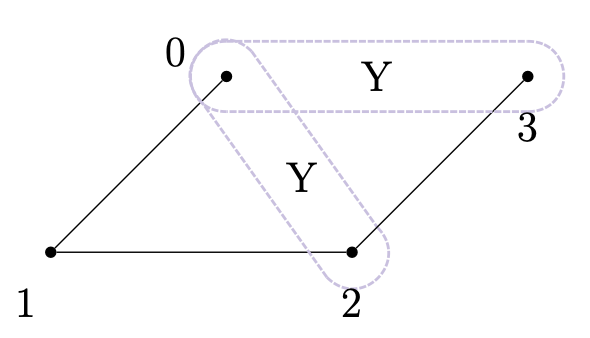

# Network to Optical Protocol

Now we can conver the fusion network into instructions that can be executed on a SEMM device.

In [15]:
from optyx.compiler.semm import compile_linear_fn

gflow = og.find_gflow()
ins = compile_linear_fn(fn, gflow.partial_order())

for instruction in ins:
    print(instruction)

NextResourceStateOp()
NextNodeOp(node_id=0)
FusionOp(delay=6, fusion_type='X')
FusionOp(delay=3, fusion_type='X')
MeasureOp(delay=0, measurement=Measurement(angle=0, plane=<Plane.XY: 0>))
NextNodeOp(node_id=1)
MeasureOp(delay=0, measurement=Measurement(angle=1, plane=<Plane.XY: 0>))
NextNodeOp(node_id=2)
FusionOp(delay=0, fusion_type='X')
MeasureOp(delay=0, measurement=Measurement(angle=2, plane=<Plane.XY: 0>))
NextNodeOp(node_id=3)
FusionOp(delay=0, fusion_type='X')
UnmeasuredOp()


These instructions implement the following photonic diagram. Each black dot now represents a photon and the blue dotted lines are used to denote photons that are part of the same GHZ state.
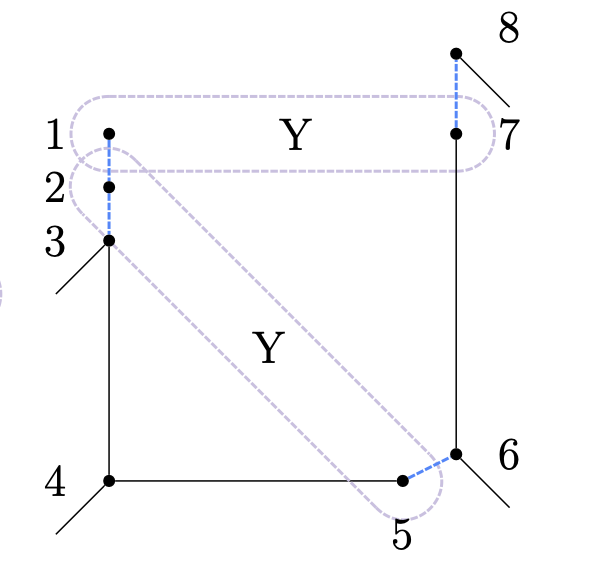